<a href="https://colab.research.google.com/github/zangell44/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

Inline Equation
$x=2$

Block Equation
$$
x=2
$$

Aligned
$$
\begin{aligned}
x&=2\\
&1+1
\end{aligned}
$$

Bayes' Proof
$$
\begin{aligned}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\\
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
P(B|A)P(A) &= P(B \cap A)\\
P(B|A)P(A) &= P(A \cap B)\\
\\
&=\frac{P{(B|A)P(A)}}{P(B)}
\end{aligned}
$$

In [0]:
# imports
import numpy as np
import pandas as pd
import scipy

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy.stats import bayes_mvs

data_binom = np.random.binomial(n=10, p=0.6, size=100)

In [0]:
# frequentist approach
# utility functions
from collections import namedtuple
import scipy.stats as stats
ConfidenceInterval= namedtuple("ConfidenceInterval", "mean low high")

def confidence_interval(data=None, alpha=0.05):
  """
  Calculate a confidence interval around a sample mean for given data
  
  Parameters
  ----------
  
  data : iterable
  
  confidence : level of confidence for the interval (float)
  
  Returns
  ----------
  
  tuple of (mean, lower bound, uppper bound)
  
  """
  if len(data) == 0: # make sure we have data
    return None
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf(1- (alpha / 2), n-1) 
  
  return ConfidenceInterval(mean, mean-interval, mean+interval)

In [59]:
conf_freq = confidence_interval(data=data_binom)
conf_freq

ConfidenceInterval(mean=5.85, low=5.491734751653049, high=6.20826524834695)

In [60]:
conf_bayes = bayes_mvs(data=data_binom, alpha=0.95)

conf_bayes

(Mean(statistic=5.85, minmax=(5.491734751653049, 6.20826524834695)),
 Variance(statistic=3.327319587628867, minmax=(2.5131988953628515, 4.399471752030545)),
 Std_dev(statistic=1.8193990452988902, minmax=(1.5853071927430504, 2.097491776391637)))

In [61]:
# medical hypothetical
import random

# two groups of people
treatment = np.random.binomial(n=1, p=0.65, size=50)
control = np.random.binomial(n=1, p=0.4, size=50)

control.size

50

In [62]:
import pandas as pd
df = pd.DataFrame({'treatment' : treatment, 'control' : control})
df.head()

,control,treatment
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1


In [63]:
# frequentist hypothesis test
from scipy import stats
freq_test = stats.ttest_ind(df.treatment, df.control, equal_var=False)
freq_test

Ttest_indResult(statistic=3.599456093912476, pvalue=0.0005035811602338712)

In [64]:
bayes_mvs(data=df.treatment, alpha=0.95)

(Mean(statistic=0.62, minmax=(0.4806542032885823, 0.7593457967114177)),
 Variance(statistic=0.25063829787234043, minmax=(0.16775270745793194, 0.37331741993159795)),
 Std_dev(statistic=0.4979821930257678, minmax=(0.4095762535327603, 0.6109970703134328)))

In [65]:
bayes_mvs(data=df.control, alpha=0.95)

(Mean(statistic=0.28, minmax=(0.15110042250735103, 0.40889957749264905)),
 Variance(statistic=0.21446808510638302, minmax=(0.1435439126634936, 0.31944308938119764)),
 Std_dev(statistic=0.46065038052650975, minmax=(0.3788718947922814, 0.5651929665001127)))

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# function for bayseian confidence interval
from scipy.stats import bayes_mvs
from collections import namedtuple
import scipy.stats as stats
ConfidenceInterval= namedtuple("ConfidenceInterval", "mean low high")

def conf_interval_bayes(data, alpha=0.95):
  conf_bayes = bayes_mvs(data, alpha)
  return ConfidenceInterval(conf_bayes[0][0], conf_bayes[0][1][0], conf_bayes[0][1][1])

## Sampling vs. Prior Distribution (Coin Flips)

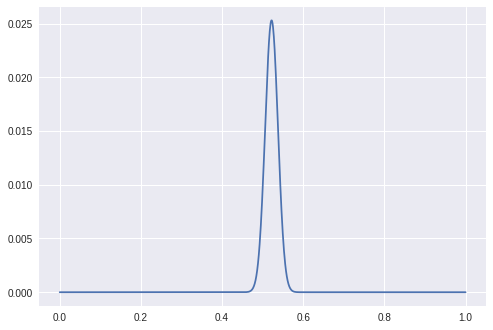

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# first, plot fiar coin flips
params = np.linspace(0,1,1000)

fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(stats.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
#sns.despine()

In [0]:
# put this plotting in a function for later plotting

def plot_dist_flips(ax, 
                    fairness=0.5, 
                    size=1000,
                    xlabel='',
                    ylabel='',
                    title='',
                    color='black',
                    label='',
                    normalize=True):
  
  params = np.linspace(0,1,size)
  flips = np.random.binomial(n=1, p=fairness, size=size)
  probs = np.array([np.product(stats.bernoulli.pmf(flips, p)) for p in params])
  if normalize: probs = probs / np.sum(probs) # normalize
  ax.plot(params, probs, color=color, label=label)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)

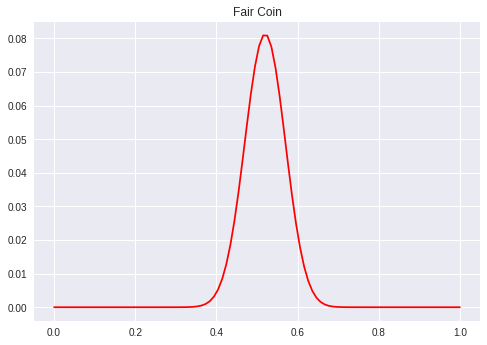

In [86]:
# testing with fair coin
fig_fair, ax_fair = plt.subplots()
plot_dist_flips(ax=ax_fair, 
                fairness=0.5, 
                size=100,
                xlabel='',
                ylabel='',
                title='Fair Coin',
                color='red',
                normalize=True)
plt.show()

In [0]:
# extend this idea to a sample distribution, prior distribution, and 
# posterior distribution for bernoulli trials
def plot_bayesian_dist(ax, 
                       prior_mean=0.5,
                       prior_size=100,
                       sample_mean=0.5,
                       sample_size=100,
                       n_params=1000,
                       xlabel='',
                       ylabel='',
                       title='',
                       colors=['black', 'red','blue'],
                       labels=['Prior Distribution','Sample Distribution', 'Posterior Distribution'],
                       normalize=True,
                       legend_loc='upper left'):
  
  params = np.linspace(0,1,n_params)
  
  # prior distribution             
  flips_prior = np.random.binomial(n=1, p=prior_mean, size=prior_size)
  probs_prior = np.array([np.product(stats.bernoulli.pmf(flips_prior, p)) for p in params])
  if normalize: probs_prior = probs_prior / np.sum(probs_prior) # normalize
  ax.plot(params, probs_prior, color=colors[0], label=labels[0])
  
  # sample distribution
  flips_sample = np.random.binomial(n=1, p=sample_mean, size=sample_size)
  probs_sample = np.array([np.product(stats.bernoulli.pmf(flips_sample, p)) for p in params])
  if normalize: probs_sample = probs_sample / np.sum(probs_sample) # normalize
  ax.plot(params, probs_sample, color=colors[1], label=labels[1])
  
  # infering posterior distribution
  probs_posterior = [probs_prior[i] * probs_sample[i] for i in range(probs_prior.shape[0])]
  probs_posterior = probs_posterior / np.sum(probs_posterior)
  ax.plot(params, probs_posterior, color=colors[2], label=labels[2])
  
  # general plotting stuff
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.legend(loc=legend_loc)

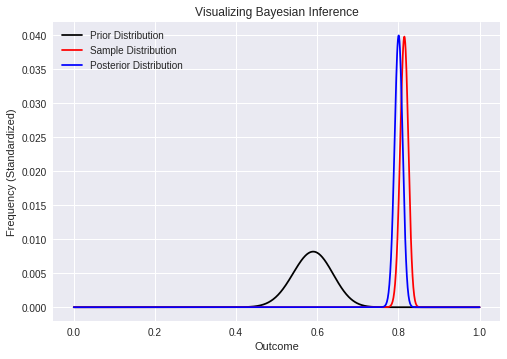

In [40]:
fig_bayes, ax_bayes = plt.subplots()

plot_bayesian_dist(ax=ax_bayes, 
                   prior_mean=0.5,
                   prior_size=100,
                   sample_mean=0.8,
                   sample_size=1500,
                   xlabel='Outcome',
                   ylabel='Frequency (Standardized)',
                   title='Visualizing Bayesian Inference',
                   colors=['black', 'red','blue'],
                   labels=['Prior Distribution','Sample Distribution', 'Posterior Distribution'],
                   normalize=True)

plt.show()

Resulting Posterior Distribution is a function of the size of evidence provided in both sample and posterior distributions.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


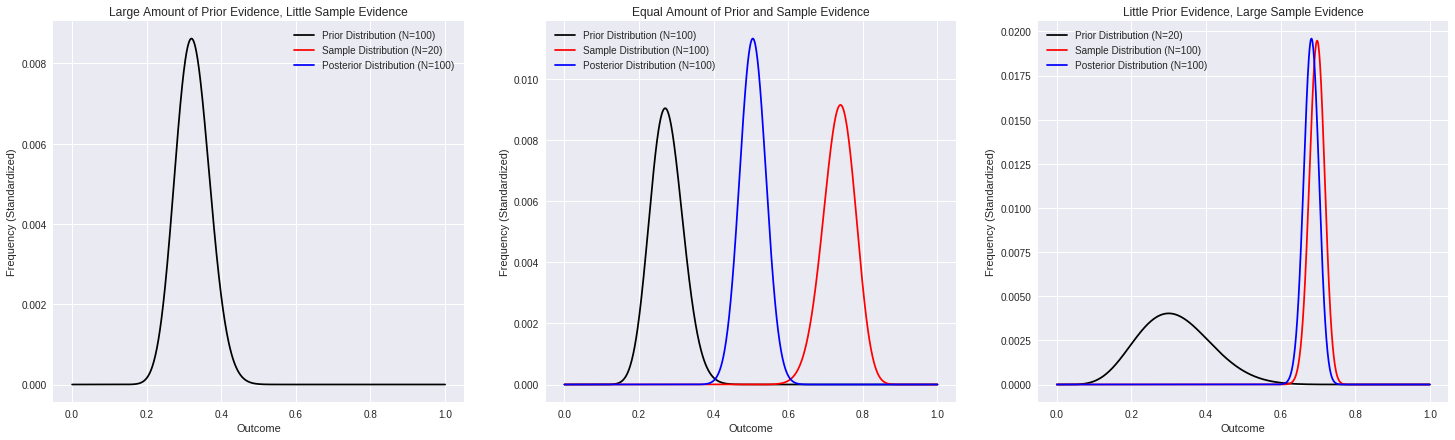

In [41]:
fig_bayes2, ax_bayes2 = plt.subplots(1,3,figsize=(25,7))

plot_bayesian_dist(ax=ax_bayes2[1], 
                   prior_mean=0.3,
                   prior_size=100,
                   sample_mean=0.7,
                   sample_size=100,
                   xlabel='Outcome',
                   ylabel='Frequency (Standardized)',
                   title='Equal Amount of Prior and Sample Evidence',
                   labels=['Prior Distribution (N=100)','Sample Distribution (N=100)', 'Posterior Distribution (N=100)'],
                   normalize=True)

plot_bayesian_dist(ax=ax_bayes2[0], 
                   prior_mean=0.3,
                   prior_size=100,
                   sample_mean=0.7,
                   sample_size=2000,
                   xlabel='Outcome',
                   ylabel='Frequency (Standardized)',
                   title='Large Amount of Prior Evidence, Little Sample Evidence',
                   labels=['Prior Distribution (N=100)','Sample Distribution (N=20)', 'Posterior Distribution (N=100)'],
                   normalize=True,
                   legend_loc='upper right')

plot_bayesian_dist(ax=ax_bayes2[2], 
                   prior_mean=0.3,
                   prior_size=20,
                   sample_mean=0.7,
                   sample_size=500,
                   xlabel='Outcome',
                   ylabel='Frequency (Standardized)',
                   title='Little Prior Evidence, Large Sample Evidence',
                   labels=['Prior Distribution (N=20)','Sample Distribution (N=100)', 'Posterior Distribution (N=100)'],
                   normalize=True)
plt.show()

## Play With PyMC3?

In [0]:
import pymc3

## Animation Testing

fig size: 72.0 DPI, size in inches [8.  5.5]
timestep 0


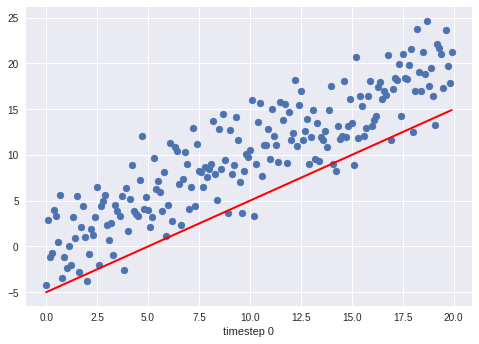

In [155]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
#fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

In [19]:
!pip install imageio

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    t = np.arange(0.0, 100, 1)
    s = t**power

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, s)
    ax.grid()
    ax.set(xlabel='X', ylabel='x^{}'.format(power),
           title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i/4, 100) for i in range(10)], fps=2)

In [0]:
def plot_bayesian_dist_gif(flips_prior,
                           flips_sample,
                           sample_size,
                           n_params=1000,
                           xlabel='Mean of x - 1000 Trials',
                           ylabel='Probability of Avg(x) = X',
                           title='Bayesian Learning',
                           colors=['black', 'red','blue'],
                           labels=['Prior Distribution','Sample Distribution', 'Posterior Distribution'],
                           legend_loc='upper left'):
  
  
  params = np.linspace(0,1,n_params)
  fig, ax = plt.subplots(figsize=(10,5))
  
  flips_sample_learned = flips_sample[:sample_size]
  
  # prior distribution             
  probs_prior = np.array([np.product(stats.bernoulli.pmf(flips_prior, p)) for p in params])
  probs_prior = probs_prior / np.sum(probs_prior) # normalize
  ax.plot(params, probs_prior, color=colors[0], label=labels[0])
  
  # sample distribution - full
  probs_sample = np.array([np.product(stats.bernoulli.pmf(flips_sample, p)) for p in params])
  probs_sample = probs_sample / np.sum(probs_sample) # normalize
  ax.plot(params, probs_sample, color=colors[1], label=labels[1])
  
  # sample distribution learned so far
  probs_sample_learned = np.array([np.product(stats.bernoulli.pmf(flips_sample_learned, p)) for p in params])
  
  # infering posterior distribution
  probs_posterior = [probs_prior[i] * probs_sample_learned[i] for i in range(probs_prior.shape[0])]
  probs_posterior = probs_posterior / np.sum(probs_posterior)
  ax.plot(params, probs_posterior, color=colors[2], label=labels[2])
  
  # general plotting stuff
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.legend(loc=legend_loc)
  
  # IMPORTANT ANIMATION CODE HERE
  # Used to keep the limits constant
  ax.set_ylim(0, 0.022)

  # Used to return the plot as an image rray
  fig.canvas.draw()       # draw the canvas, cache the renderer
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image

In [0]:
priors = np.random.binomial(n=1, p=0.3, size=100)
samples = np.random.binomial(n=1, p=0.7, size=500)

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./bayes.gif', [plot_bayesian_dist_gif(priors, 
                                                       samples, 
                                                       i, 
                                                       labels=['Prior Distribution (N=100)','Sample Distribution (N=500)', 'Posterior Distribution'],
                                                       title='Bayesian Learning - %s Samples Observed' %i) 
                                for i in range(0,len(samples),5)], 
                fps=10)

## Sentiment Analyis and Bayesian Prediction on Drug Data

### Loading Data

In [42]:
# loading data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
!unzip drugsCom_raw.zip

# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

drugs_test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')
drugs_train = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

--2018-12-05 23:15:13--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  21.3MB/s    in 1.9s    

2018-12-05 23:15:15 (21.3 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [43]:
drugs_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


### Language Processing

In [44]:
# natural language processing time lfg
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
# function to analyze sentiment of a sentence
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [0]:
#nltk_results = [nltk_sentiment(row) for row in drugs_train]
results_df = pd.DataFrame([nltk_sentiment(row) for row in drugs_train['review']])
text_df = pd.DataFrame(drugs_train, columns = ['review'])
nltk_df = text_df.join(results_df)

In [54]:
sample_text = nltk_sentiment(drugs_train['review'].values[0])
sample_text

{'compound': -0.296, 'neg': 0.136, 'neu': 0.864, 'pos': 0.0}

In [0]:
drugs_train['nltk'] = drugs_train['review'].apply(lambda row : nltk_sentiment(row))